In [27]:
import math
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
def rhat_from_vy(v,y):
    x=0.05
    delta=1.1
    t=1
    fraction = (math.pow(delta,t+1)-1)*math.pow(delta,y-t)
    fraction = fraction/ (delta-1)
    return v*(1-x)*fraction

def theoretical_bfc_size(rhat):
    return 5.64 * rhat / 8 / 1000

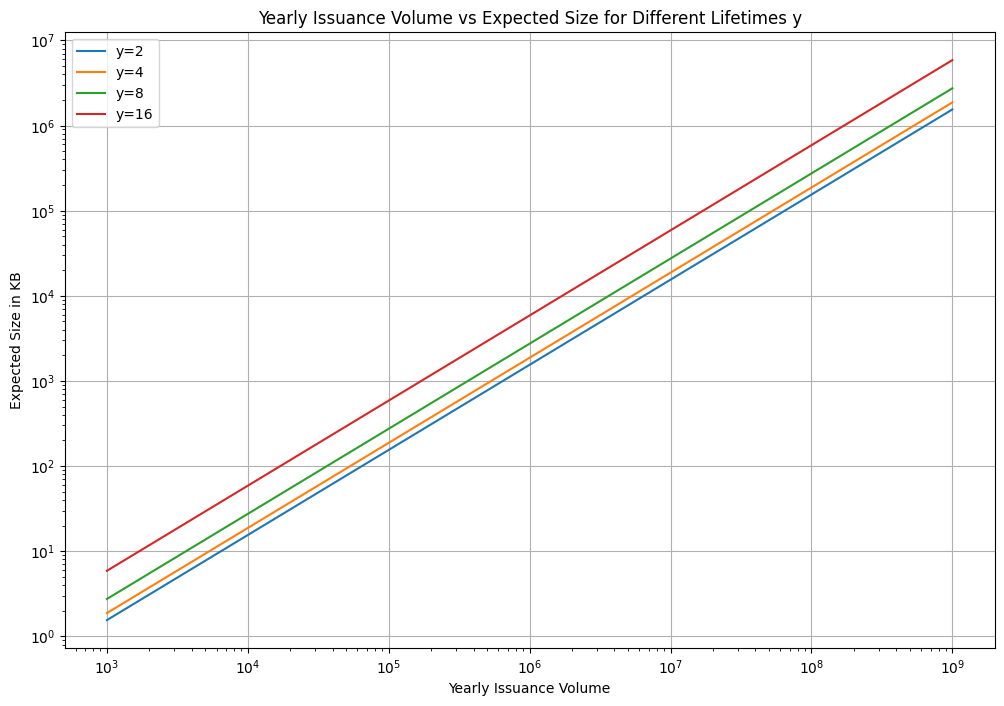

In [31]:
fig = plt.figure(figsize=(12, 8))
plt.title('Yearly Issuance Volume vs Expected Size for Different Lifetimes y')

data=[]
for vexp in range(3,10):
    for y in [2,4,8,16]:
        v=math.pow(10,vexp)
        rhat = rhat_from_vy(v,y)
        data.append([v,y,theoretical_bfc_size(rhat)])

df = pd.DataFrame(data, columns=['Volume', 'Lifetime', 'Bitsize'])

for y in df['Lifetime'].unique():
    y_data = df[df['Lifetime'] == y]
    plt.plot(y_data['Volume'], y_data['Bitsize'],
                     label=f'y={y}')

plt.xlabel('Yearly Issuance Volume')
plt.ylabel('Expected Size in KB')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()